**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
suppressMessages(suppressWarnings(library("GenomicRanges")))
suppressMessages(suppressWarnings(library("nullranges")))
suppressMessages(suppressWarnings(library("plyranges")))
suppressMessages(suppressWarnings(library("patchwork")))
suppressMessages(suppressWarnings(library("pheatmap")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [2]:
txt_region = "fcc_astarr_macs_input_overlap"
txt_fdiry = file.path(
    FD_RES, 
    "region_integration", 
    txt_region,
    "analysis_enrichment"
)
txt_fname = "region.prepare.covariate.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_covariate = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 150041      7


Chrom,ChromStart,ChromEnd,Region,ATAC,pGC,Length
chr1,10038,10405,chr1:10038-10405,0.5955004,0.523161,367
chr1,14282,14614,chr1:14282-14614,0.4535793,0.578313,332
chr1,16025,16338,chr1:16025-16338,0.5832908,0.587859,313


In [13]:
txt_region = "fcc_astarr_macs_input_overlap"
txt_fdiry = file.path(
    FD_RES, 
    "region_integration", 
    txt_region,
    "analysis_enrichment"
)
txt_fname = "region.prepare.fcc.tss.chipseq.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

mat_region_annot_merge = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 150041    538


Region,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,LMPRA_R,TMPRA_R,CRISPRi-HCRFF,CRISPRi-Growth,CRISPR-E2G,TSS,ADNP,AFF1,AGO1,ARHGAP35,ARID1B,ARID2,ARID3A,ARID3B,ARID4B,ARNT,ASH1L,ATF1,ATF2,ATF3,ATF4,ATF6,ATF7,BACH1,BCL6,BCLAF1,BCOR,BDP1,BHLHE40,BMI1,BRCA1,BRD4,BRD9,BRF1,BRF2,C11orf30,CAMTA2,CBFA2T2,CBFA2T3,CBFB,CBX1,CBX2,CBX3,CBX5,CBX8,CC2D1A,CCAR2,CCNT2,CDC5L,CEBPB,CEBPG,CEBPZ,CGGBP1,CHAMP1,CHCHD3,CHD1,CHD2,CHD4,CHD7,CLOCK,COPS2,CREB1,CREB3,CREB3L1,CREB5,CREBBP,CREM,CSDE1,CTBP1,CTCF,CTCFL,CUX1,CXXC5,DACH1,DDIT3,DDX20,DEAF1,DIDO1,DLX4,DMBX1,DMTF1,DNMT1,DPF2,E2F1,E2F3,E2F4,E2F5,E2F6,E2F7,E2F8,E4F1,EGR1,EHMT2,ELF1,ELF2,ELF4,ELK1,ELK3,EP300,EP400,ERF,ESRRA,ESRRB,ETS1,ETS2,ETV1,ETV5,ETV6,EWSR1,EZH2,FIP1L1,FOS,FOSL1,FOXA1,FOXA3,FOXJ2,FOXJ3,FOXK1,FOXK2,FOXM1,FOXO4,FOXP1,FOXP4,FUS,GABPA,GABPB1,GABPB2,GATA1,GATA2,GATAD2A,GATAD2B,GMEB1,GTF2A2,GTF2B,GTF2E2,GTF2F1,GTF2I,GTF3C2,H2AFZ,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me1,H3K9me3,H4K20me1,HBP1,HCFC1,HDAC1,HDAC2,HDAC3,HDAC6,HDAC8,HDGF,HES1,HEY1,HINFP,HIVEP1,HLTF,HMBOX1,HMG20A,HMG20B,HMGN3,HNRNPH1,HNRNPK,HNRNPL,HNRNPLL,HNRNPUL1,HOMEZ,HOXB6,HSF4,ID3,IFI16,IKZF1,ILF3,ILK,IRF1,IRF2,IRF9,JUN,JUNB,JUND,KAT2B,KAT7,KAT8,KDM1A,KDM2B,KDM4B,KDM5B,KHSRP,KLF1,KLF10,KLF13,KLF16,KLF6,L3MBTL2,LARP7,LCOR,LEF1,MAFF,MAFG,MAFK,MAX,MAZ,MBD1,MBD2,MCM2,MCM3,MCM5,MCM7,MECOM,MEF2A,MEF2D,MEIS2,MGA,MIER1,MITF,MLLT1,MLX,MNT,MTA1,MTA2,MTA3,MTF1,MXD1,MXI1,MYBL2,MYC,MYNN,NBN,NCOA1,NCOA2,NCOA4,NCOA6,NCOR1,NELFE,NEUROD1,NFATC3,NFE2,NFE2L1,NFIC,NFIX,NFRKB,NFXL1,NFYA,NFYB,NKRF,NONO,NR0B1,NR1H2,NR2C1,NR2C2,NR2F1,NR2F2,NR2F6,NR3C1,NR4A1,NRF1,NUFIP1,OTX1,PATZ1,PBX2,PCBP1,PCBP2,PHB,PHB2,PHF20,PHF21A,PHF8,PHTF2,PKNOX1,PML,POLR2A,POLR2AphosphoS2,POLR2AphosphoS5,POLR2B,POLR2G,POLR2H,POLR3A,POLR3G,POU5F1,PPARD,PRDM10,PRMT5,PRPF4,PTBP1,PTRF,PTTG1,PURB,PYGO2,RAD21,RAD51,RB1,RBBP5,RBFOX2,RBM14,RBM15,RBM17,RBM22,RBM25,RBM34,RBM39,RBPJ,RCOR1,RELA,REST,RFX1,RFX5,RFX7,RHOXF2B,RLF,RNF2,RNF219,RREB1,RUNX1,SAFB,SAFB2,SAP30,SETDB1,SFPQ,SIN3A,SIN3B,SIRT6,SIX5,SKIL,SLC30A9,SMAD1,SMAD2,SMAD3,SMAD4,SMAD5,SMARCA4,SMARCA5,SMARCB1,SMARCC2,SMARCE1,SMC3,SNAPC5,SNIP1,SNRNP70,SOX6,SP1,SP2,SPI1,SREBF1,SREBF2,SRF,SRSF1,SRSF3,SRSF7,STAG1,STAT5A,STAT5B,SUPT5H,SUZ12,TAF1,TAF15,TAF7,TAF9B,TAL1,TARDBP,TBL1XR1,TBP,TBPL1,TBX18,TCF12,TCF15,TCF3,TCF7,TCF7L2,TCFL5,TEAD1,TEAD2,TEAD4,TFAM,TFAP4,TFCP2,TFDP1,TFE3,TGIF2,THAP1,THAP12,THAP7,THRA,THRAP3,THRB,TOE1,TRIM24,TRIM25,TRIM28,TRIP13,TSC22D4,TSHZ1,U2AF1,U2AF2,UBTF,USF1,USF2,VEZF1,WHSC1,XRCC3,XRCC4,XRCC5,YBX1,YBX3,YY1,ZBED1,ZBTB11,ZBTB12,ZBTB17,ZBTB2,ZBTB26,ZBTB33,ZBTB34,ZBTB40,ZBTB49,ZBTB5,ZBTB7A,ZBTB8A,ZBTB9,ZC3H11A,ZC3H4,ZC3H8,ZEB2,ZFP1,ZFP30,ZFP36,ZFP91,ZFPM2,ZFX,ZHX1,ZKSCAN1,ZKSCAN3,ZKSCAN8,ZMIZ1,ZMYM3,ZNF12,ZNF121,ZNF124,ZNF133,ZNF134,ZNF140,ZNF143,ZNF146,ZNF148,ZNF165,ZNF174,ZNF175,ZNF184,ZNF197,ZNF212,ZNF215,ZNF217,ZNF224,ZNF23,ZNF232,ZNF239,ZNF24,ZNF253,ZNF257,ZNF263,ZNF274,ZNF277,ZNF280A,ZNF280B,ZNF281,ZNF282,ZNF3,ZNF311,ZNF316,ZNF318,ZNF319,ZNF324,ZNF347,ZNF354B,ZNF354C,ZNF384,ZNF395,ZNF397,ZNF398,ZNF407,ZNF408,ZNF41,ZNF431,ZNF436,ZNF444,ZNF445,ZNF449,ZNF507,ZNF511,ZNF512,ZNF518B,ZNF551,ZNF561,ZNF57,ZNF583,ZNF584,ZNF586,ZNF589,ZNF592,ZNF639,ZNF644,ZNF655,ZNF668,ZNF695,ZNF696,ZNF699,ZNF7,ZNF700,ZNF707,ZNF717,ZNF740,ZNF75A,ZNF76,ZNF764,ZNF766,ZNF77,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
chr1:10038-10405,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [4]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary_v2"
)
txt_fname = "umap.cluster.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_umap_cluster = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 87610     4


Region,UMAP1,UMAP2,Cluster
chr1:10038-10405,-21.87767,-9.176196,39
chr1:16025-16338,-12.15321,-12.879920,20
chr1:115429-115969,-11.02704,-3.031374,0


## Split the regions

In [7]:
dat = dat_region_umap_cluster
table(dat$Cluster)


   -1     0     1     2     3     4     5     6     7     8     9    10    11 
   75 15633 12718  9102  6425  4213  3406  2879  2516  2149  2048  1726  1635 
   12    13    14    15    16    17    18    19    20    21    22    23    24 
 1600  1500  1345  1185  1149  1107  1078  1077  1065   986   896   785   658 
   25    26    27    28    29    30    31    32    33    34    35    36    37 
  655   621   588   583   566   498   473   441   441   439   432   426   352 
   38    39    40    41    42    43    44    45    46 
  347   287   275   272   235   231   190   166   136 

In [9]:
dat = dat_region_umap_cluster
dat = dat %>% 
    dplyr::filter(Cluster >= 0) %>%
    dplyr::mutate(Cluster = paste("cluster", Cluster, sep = "_"))

lst = split(dat$Region, dat$Cluster)
lst = lapply(lst, function(vec){
    dat = dat_region_covariate
    dat = dat %>% dplyr::filter(Region %in% vec) %>% dplyr::distinct()
    return(dat)
})

lst_dat_region = lst

In [10]:
lst = lst_dat_region
lapply(lst, nrow)

$cluster_0
[1] 15633

$cluster_1
[1] 12718

$cluster_10
[1] 1726

$cluster_11
[1] 1635

$cluster_12
[1] 1600

$cluster_13
[1] 1500

$cluster_14
[1] 1345

$cluster_15
[1] 1185

$cluster_16
[1] 1149

$cluster_17
[1] 1107

$cluster_18
[1] 1078

$cluster_19
[1] 1077

$cluster_2
[1] 9102

$cluster_20
[1] 1065

$cluster_21
[1] 986

$cluster_22
[1] 896

$cluster_23
[1] 785

$cluster_24
[1] 658

$cluster_25
[1] 655

$cluster_26
[1] 621

$cluster_27
[1] 588

$cluster_28
[1] 583

$cluster_29
[1] 566

$cluster_3
[1] 6425

$cluster_30
[1] 498

$cluster_31
[1] 473

$cluster_32
[1] 441

$cluster_33
[1] 441

$cluster_34
[1] 439

$cluster_35
[1] 432

$cluster_36
[1] 426

$cluster_37
[1] 352

$cluster_38
[1] 347

$cluster_39
[1] 287

$cluster_4
[1] 4213

$cluster_40
[1] 275

$cluster_41
[1] 272

$cluster_42
[1] 235

$cluster_43
[1] 231

$cluster_44
[1] 190

$cluster_45
[1] 166

$cluster_46
[1] 136

$cluster_5
[1] 3406

$cluster_6
[1] 2879

$cluster_7
[1] 2516

$cluster_8
[1] 2149

$cluster_9
[1] 2048

## Prepare regions

In [11]:
lst = lst_dat_region
lst = lapply(lst, function(dat){
    grg = GRanges(
        seqnames = dat$Chrom,
        ranges = IRanges(
            start = dat$ChromStart, 
            end   = dat$ChromEnd
        ),
        Region = dat$Region,
        ATAC   = dat$ATAC,
        pGC    = dat$pGC,
        Length = dat$Length
    )
    return(grg)
})

lst_grg_region = lst

## Prepare Matrix

In [14]:
dat = mat_region_annot_merge
dat = dat %>% column_to_rownames("Region") 

mat_region_annot_prepare = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 150041    537


,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,LMPRA_R,TMPRA_R,CRISPRi-HCRFF,CRISPRi-Growth,CRISPR-E2G,TSS,ADNP,AFF1,AGO1,ARHGAP35,ARID1B,ARID2,ARID3A,ARID3B,ARID4B,ARNT,ASH1L,ATF1,ATF2,ATF3,ATF4,ATF6,ATF7,BACH1,BCL6,BCLAF1,BCOR,BDP1,BHLHE40,BMI1,BRCA1,BRD4,BRD9,BRF1,BRF2,C11orf30,CAMTA2,CBFA2T2,CBFA2T3,CBFB,CBX1,CBX2,CBX3,CBX5,CBX8,CC2D1A,CCAR2,CCNT2,CDC5L,CEBPB,CEBPG,CEBPZ,CGGBP1,CHAMP1,CHCHD3,CHD1,CHD2,CHD4,CHD7,CLOCK,COPS2,CREB1,CREB3,CREB3L1,CREB5,CREBBP,CREM,CSDE1,CTBP1,CTCF,CTCFL,CUX1,CXXC5,DACH1,DDIT3,DDX20,DEAF1,DIDO1,DLX4,DMBX1,DMTF1,DNMT1,DPF2,E2F1,E2F3,E2F4,E2F5,E2F6,E2F7,E2F8,E4F1,EGR1,EHMT2,ELF1,ELF2,ELF4,ELK1,ELK3,EP300,EP400,ERF,ESRRA,ESRRB,ETS1,ETS2,ETV1,ETV5,ETV6,EWSR1,EZH2,FIP1L1,FOS,FOSL1,FOXA1,FOXA3,FOXJ2,FOXJ3,FOXK1,FOXK2,FOXM1,FOXO4,FOXP1,FOXP4,FUS,GABPA,GABPB1,GABPB2,GATA1,GATA2,GATAD2A,GATAD2B,GMEB1,GTF2A2,GTF2B,GTF2E2,GTF2F1,GTF2I,GTF3C2,H2AFZ,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me1,H3K9me3,H4K20me1,HBP1,HCFC1,HDAC1,HDAC2,HDAC3,HDAC6,HDAC8,HDGF,HES1,HEY1,HINFP,HIVEP1,HLTF,HMBOX1,HMG20A,HMG20B,HMGN3,HNRNPH1,HNRNPK,HNRNPL,HNRNPLL,HNRNPUL1,HOMEZ,HOXB6,HSF4,ID3,IFI16,IKZF1,ILF3,ILK,IRF1,IRF2,IRF9,JUN,JUNB,JUND,KAT2B,KAT7,KAT8,KDM1A,KDM2B,KDM4B,KDM5B,KHSRP,KLF1,KLF10,KLF13,KLF16,KLF6,L3MBTL2,LARP7,LCOR,LEF1,MAFF,MAFG,MAFK,MAX,MAZ,MBD1,MBD2,MCM2,MCM3,MCM5,MCM7,MECOM,MEF2A,MEF2D,MEIS2,MGA,MIER1,MITF,MLLT1,MLX,MNT,MTA1,MTA2,MTA3,MTF1,MXD1,MXI1,MYBL2,MYC,MYNN,NBN,NCOA1,NCOA2,NCOA4,NCOA6,NCOR1,NELFE,NEUROD1,NFATC3,NFE2,NFE2L1,NFIC,NFIX,NFRKB,NFXL1,NFYA,NFYB,NKRF,NONO,NR0B1,NR1H2,NR2C1,NR2C2,NR2F1,NR2F2,NR2F6,NR3C1,NR4A1,NRF1,NUFIP1,OTX1,PATZ1,PBX2,PCBP1,PCBP2,PHB,PHB2,PHF20,PHF21A,PHF8,PHTF2,PKNOX1,PML,POLR2A,POLR2AphosphoS2,POLR2AphosphoS5,POLR2B,POLR2G,POLR2H,POLR3A,POLR3G,POU5F1,PPARD,PRDM10,PRMT5,PRPF4,PTBP1,PTRF,PTTG1,PURB,PYGO2,RAD21,RAD51,RB1,RBBP5,RBFOX2,RBM14,RBM15,RBM17,RBM22,RBM25,RBM34,RBM39,RBPJ,RCOR1,RELA,REST,RFX1,RFX5,RFX7,RHOXF2B,RLF,RNF2,RNF219,RREB1,RUNX1,SAFB,SAFB2,SAP30,SETDB1,SFPQ,SIN3A,SIN3B,SIRT6,SIX5,SKIL,SLC30A9,SMAD1,SMAD2,SMAD3,SMAD4,SMAD5,SMARCA4,SMARCA5,SMARCB1,SMARCC2,SMARCE1,SMC3,SNAPC5,SNIP1,SNRNP70,SOX6,SP1,SP2,SPI1,SREBF1,SREBF2,SRF,SRSF1,SRSF3,SRSF7,STAG1,STAT5A,STAT5B,SUPT5H,SUZ12,TAF1,TAF15,TAF7,TAF9B,TAL1,TARDBP,TBL1XR1,TBP,TBPL1,TBX18,TCF12,TCF15,TCF3,TCF7,TCF7L2,TCFL5,TEAD1,TEAD2,TEAD4,TFAM,TFAP4,TFCP2,TFDP1,TFE3,TGIF2,THAP1,THAP12,THAP7,THRA,THRAP3,THRB,TOE1,TRIM24,TRIM25,TRIM28,TRIP13,TSC22D4,TSHZ1,U2AF1,U2AF2,UBTF,USF1,USF2,VEZF1,WHSC1,XRCC3,XRCC4,XRCC5,YBX1,YBX3,YY1,ZBED1,ZBTB11,ZBTB12,ZBTB17,ZBTB2,ZBTB26,ZBTB33,ZBTB34,ZBTB40,ZBTB49,ZBTB5,ZBTB7A,ZBTB8A,ZBTB9,ZC3H11A,ZC3H4,ZC3H8,ZEB2,ZFP1,ZFP30,ZFP36,ZFP91,ZFPM2,ZFX,ZHX1,ZKSCAN1,ZKSCAN3,ZKSCAN8,ZMIZ1,ZMYM3,ZNF12,ZNF121,ZNF124,ZNF133,ZNF134,ZNF140,ZNF143,ZNF146,ZNF148,ZNF165,ZNF174,ZNF175,ZNF184,ZNF197,ZNF212,ZNF215,ZNF217,ZNF224,ZNF23,ZNF232,ZNF239,ZNF24,ZNF253,ZNF257,ZNF263,ZNF274,ZNF277,ZNF280A,ZNF280B,ZNF281,ZNF282,ZNF3,ZNF311,ZNF316,ZNF318,ZNF319,ZNF324,ZNF347,ZNF354B,ZNF354C,ZNF384,ZNF395,ZNF397,ZNF398,ZNF407,ZNF408,ZNF41,ZNF431,ZNF436,ZNF444,ZNF445,ZNF449,ZNF507,ZNF511,ZNF512,ZNF518B,ZNF551,ZNF561,ZNF57,ZNF583,ZNF584,ZNF586,ZNF589,ZNF592,ZNF639,ZNF644,ZNF655,ZNF668,ZNF695,ZNF696,ZNF699,ZNF7,ZNF700,ZNF707,ZNF717,ZNF740,ZNF75A,ZNF76,ZNF764,ZNF766,ZNF77,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
chr1:10038-10405,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## Test

In [17]:
lst = lst_grg_region
vec = names(lst)
vec_txt_group = vec
print(vec)

 [1] "cluster_0"  "cluster_1"  "cluster_10" "cluster_11" "cluster_12"
 [6] "cluster_13" "cluster_14" "cluster_15" "cluster_16" "cluster_17"
[11] "cluster_18" "cluster_19" "cluster_2"  "cluster_20" "cluster_21"
[16] "cluster_22" "cluster_23" "cluster_24" "cluster_25" "cluster_26"
[21] "cluster_27" "cluster_28" "cluster_29" "cluster_3"  "cluster_30"
[26] "cluster_31" "cluster_32" "cluster_33" "cluster_34" "cluster_35"
[31] "cluster_36" "cluster_37" "cluster_38" "cluster_39" "cluster_4" 
[36] "cluster_40" "cluster_41" "cluster_42" "cluster_43" "cluster_44"
[41] "cluster_45" "cluster_46" "cluster_5"  "cluster_6"  "cluster_7" 
[46] "cluster_8"  "cluster_9" 


In [18]:
dat = mat_region_annot_prepare
vec = colnames(dat)
vec_txt_feature = vec

print(length(vec))
print(head(vec))

[1] 537
[1] "ASTARR_A" "WSTARR_A" "LMPRA_A"  "TMPRA_A"  "ASTARR_R" "WSTARR_R"


In [49]:
lst = lst_grg_region
lst = lapply(lst[1:3], head, 3)
lst

$cluster_0
GRanges object with 3 ranges and 4 metadata columns:
      seqnames          ranges strand |               Region      ATAC
         <Rle>       <IRanges>  <Rle> |          <character> <numeric>
  [1]     chr1   115429-115969      * |   chr1:115429-115969   1.17888
  [2]     chr1   842516-843431      * |   chr1:842516-843431   1.02965
  [3]     chr1 1005094-1005553      * | chr1:1005094-1005553   1.27431
            pGC    Length
      <numeric> <numeric>
  [1]  0.381481       540
  [2]  0.560656       915
  [3]  0.603486       459
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

$cluster_1
GRanges object with 3 ranges and 4 metadata columns:
      seqnames        ranges strand |             Region      ATAC       pGC
         <Rle>     <IRanges>  <Rle> |        <character> <numeric> <numeric>
  [1]     chr1 778233-779389      * | chr1:778233-779389   1.72711  0.604671
  [2]     chr1 826796-828040      * | chr1:826796-828040   1.51533  0.685691
  

In [50]:
txt_group = vec_txt_group[1]
lst[txt_group]

$cluster_0
GRanges object with 3 ranges and 4 metadata columns:
      seqnames          ranges strand |               Region      ATAC
         <Rle>       <IRanges>  <Rle> |          <character> <numeric>
  [1]     chr1   115429-115969      * |   chr1:115429-115969   1.17888
  [2]     chr1   842516-843431      * |   chr1:842516-843431   1.02965
  [3]     chr1 1005094-1005553      * | chr1:1005094-1005553   1.27431
            pGC    Length
      <numeric> <numeric>
  [1]  0.381481       540
  [2]  0.560656       915
  [3]  0.603486       459
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths


In [51]:
tmp = lst[setdiff(names(lst), txt_group)]
tmp

$cluster_1
GRanges object with 3 ranges and 4 metadata columns:
      seqnames        ranges strand |             Region      ATAC       pGC
         <Rle>     <IRanges>  <Rle> |        <character> <numeric> <numeric>
  [1]     chr1 778233-779389      * | chr1:778233-779389   1.72711  0.604671
  [2]     chr1 826796-828040      * | chr1:826796-828040   1.51533  0.685691
  [3]     chr1 903783-905204      * | chr1:903783-905204   1.08028  0.723434
         Length
      <numeric>
  [1]      1156
  [2]      1244
  [3]      1421
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

$cluster_10
GRanges object with 3 ranges and 4 metadata columns:
      seqnames          ranges strand |               Region      ATAC
         <Rle>       <IRanges>  <Rle> |          <character> <numeric>
  [1]     chr1 3939409-3940552      * | chr1:3939409-3940552  0.467025
  [2]     chr1 4745291-4746121      * | chr1:4745291-4746121  0.380813
  [3]     chr1 5949422-5949929      * | chr1:

In [52]:
Reduce(c, GRangesList(tmp))

GRanges object with 6 ranges and 4 metadata columns:
      seqnames          ranges strand |               Region      ATAC
         <Rle>       <IRanges>  <Rle> |          <character> <numeric>
  [1]     chr1   778233-779389      * |   chr1:778233-779389  1.727108
  [2]     chr1   826796-828040      * |   chr1:826796-828040  1.515326
  [3]     chr1   903783-905204      * |   chr1:903783-905204  1.080277
  [4]     chr1 3939409-3940552      * | chr1:3939409-3940552  0.467025
  [5]     chr1 4745291-4746121      * | chr1:4745291-4746121  0.380813
  [6]     chr1 5949422-5949929      * | chr1:5949422-5949929  0.882350
            pGC    Length
      <numeric> <numeric>
  [1]  0.604671      1156
  [2]  0.685691      1244
  [3]  0.723434      1421
  [4]  0.567804      1143
  [5]  0.549398       830
  [6]  0.558185       507
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

In [33]:
unlist(as(lst[setdiff(names(lst), txt_group)], "GRangesList"))

GRanges object with 6 ranges and 4 metadata columns:
             seqnames          ranges strand |               Region      ATAC
                <Rle>       <IRanges>  <Rle> |          <character> <numeric>
   cluster_1     chr1   778233-779389      * |   chr1:778233-779389  1.727108
   cluster_1     chr1   826796-828040      * |   chr1:826796-828040  1.515326
   cluster_1     chr1   903783-905204      * |   chr1:903783-905204  1.080277
  cluster_10     chr1 3939409-3940552      * | chr1:3939409-3940552  0.467025
  cluster_10     chr1 4745291-4746121      * | chr1:4745291-4746121  0.380813
  cluster_10     chr1 5949422-5949929      * | chr1:5949422-5949929  0.882350
                   pGC    Length
             <numeric> <numeric>
   cluster_1  0.604671      1156
   cluster_1  0.685691      1244
   cluster_1  0.723434      1421
  cluster_10  0.567804      1143
  cluster_10  0.549398       830
  cluster_10  0.558185       507
  -------
  seqinfo: 23 sequences from an unspecified genom

In [53]:
lst_outer = list()
for (txt_group in vec_txt_group[1:2]){
    ### show progress
    cat(txt_group, "\n")
    flush.console()
    
    ### Match ranges
    set.seed(123)

    grg1 = lst_grg_region[[txt_group]]
    vec  = setdiff(vec_txt_group, txt_group)
    lst  = lst_grg_region[vec]
    grg2 = Reduce(c, GRangesList(lst))
    print(head(grg1))
    print(head(grg2))

    mgr = matchRanges(
        focal = grg1,
        pool  = grg2,
        covar = ~ ATAC + pGC
    )
    cat("==========================\n")
    
}

cluster_0 
GRanges object with 6 ranges and 4 metadata columns:
      seqnames          ranges strand |               Region      ATAC
         <Rle>       <IRanges>  <Rle> |          <character> <numeric>
  [1]     chr1   115429-115969      * |   chr1:115429-115969   1.17888
  [2]     chr1   842516-843431      * |   chr1:842516-843431   1.02965
  [3]     chr1 1005094-1005553      * | chr1:1005094-1005553   1.27431
  [4]     chr1 1109562-1110412      * | chr1:1109562-1110412   1.08958
  [5]     chr1 1185016-1185979      * | chr1:1185016-1185979   1.11942
  [6]     chr1 1433071-1434080      * | chr1:1433071-1434080   1.42192
            pGC    Length
      <numeric> <numeric>
  [1]  0.381481       540
  [2]  0.560656       915
  [3]  0.603486       459
  [4]  0.477647       850
  [5]  0.578401       963
  [6]  0.654113      1009
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths
GRanges object with 6 ranges and 4 metadata columns:
      seqnames        ranges st

In [55]:
lst_outer = list()
for (txt_group in vec_txt_group){
    ### show progress
    cat(txt_group, "\n")
    flush.console()
    
    ### Match ranges
    set.seed(123)

    grg1 = lst_grg_region[[txt_group]]
    vec  = setdiff(vec_txt_group, txt_group)
    lst  = lst_grg_region[vec]
    grg2 = Reduce(c, GRangesList(lst))
    
    mgr = matchRanges(
        focal = grg1,
        pool  = grg2,
        covar = ~ ATAC + pGC
    )
    
    ### Extract
    dat  = mat_region_annot_prepare
    vec1 = focal(mgr)$Region
    vec2 = matched(mgr)$Region
    dat1 = dat[vec1,]
    dat2 = dat[vec2,]
    dat1$Label_Group = 1
    dat2$Label_Group = 0

    ### Combine
    dat = bind_rows(dat1, dat2)
    mat_region_annot_test = dat

    ### init loop
    lst_inner = list()
    for (txt_feature in vec_txt_feature){

        ###
        dat = mat_region_annot_test
        dat[,"Label_Feature"] = dat[,txt_feature]
        dat = dat %>% 
            dplyr::select(Label_Group, Label_Feature) %>% 
            dplyr::mutate(
                Label_Group   = factor(Label_Group,   levels = c(0,1)),
                Label_Feature = factor(Label_Feature, levels = c(0,1))
            )

        ###
        mat = table(dat$Label_Group, dat$Label_Feature)
        mat = mat + 1
        fit = fisher.test(mat)

        ###
        lst_inner[[txt_feature]] = fit
    }
    ###
    lst_outer[[txt_group]] = lst_inner
}

lst_fit_fisher = lst_outer

cluster_0 
cluster_1 
cluster_10 
cluster_11 
cluster_12 
cluster_13 
cluster_14 
cluster_15 
cluster_16 
cluster_17 
cluster_18 
cluster_19 
cluster_2 
cluster_20 
cluster_21 
cluster_22 
cluster_23 
cluster_24 
cluster_25 
cluster_26 
cluster_27 
cluster_28 
cluster_29 
cluster_3 
cluster_30 
cluster_31 
cluster_32 
cluster_33 
cluster_34 
cluster_35 
cluster_36 
cluster_37 
cluster_38 
cluster_39 
cluster_4 
cluster_40 
cluster_41 
cluster_42 
cluster_43 
cluster_44 
cluster_45 
cluster_46 
cluster_5 
cluster_6 
cluster_7 
cluster_8 
cluster_9 


## Summary

In [56]:
lst_outer = lst_fit_fisher

lst = lapply(lst_outer, function(lst_inner){
    lst = lapply(lst_inner, function(fit){
        res = c(fit$estimate, fit$p.value)
        names(res) = c("OddsRatio", "Pval")
    return(res)
    })
    
    dat = bind_rows(lst, .id = "Feature")
    return(dat)
})
dat = bind_rows(lst, .id = "Group")
dat = dat %>% 
    dplyr::mutate(Log2OR  = log2(OddsRatio)) %>%
    dplyr::mutate(PvalAdj = p.adjust(Pval, method = "BH")) %>%
    dplyr::mutate(NLog10P = -log10(PvalAdj))
                            
dat_res_fisher = dat
print(dim(dat))
head(dat)

[1] 25239     7


Group,Feature,OddsRatio,Pval,Log2OR,PvalAdj,NLog10P
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cluster_0,ASTARR_A,1.2796941,5.496863e-25,0.3557990,6.411059e-24,23.193070
cluster_0,WSTARR_A,0.8588281,1.577393e-09,-0.2195588,9.237083e-09,8.034465
cluster_0,LMPRA_A,1.1936170,1.955741e-13,0.2553400,1.466022e-12,11.833860
cluster_0,TMPRA_A,0.9933998,1.000000e+00,-0.0095537,1.000000e+00,0.000000
cluster_0,ASTARR_R,0.6968982,8.045239e-56,-0.5209802,1.751974e-54,53.756472
cluster_0,WSTARR_R,1.2148204,1.336015e-02,0.2807430,3.477332e-02,1.458754


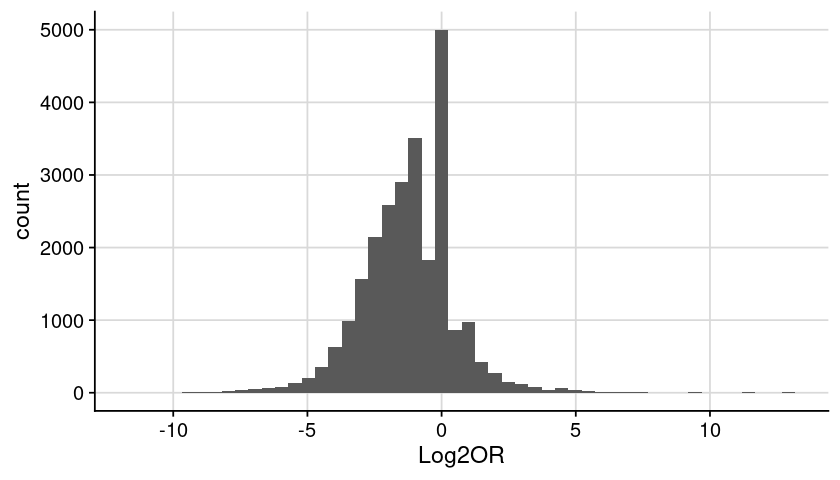

In [57]:
dat = dat_res_fisher
gpt = ggplot(dat, aes(x = Log2OR)) +
    geom_histogram(bins = 50) +
    theme_cowplot() +
    background_grid()

options(repr.plot.height = 4, repr.plot.width=7)
print(gpt)

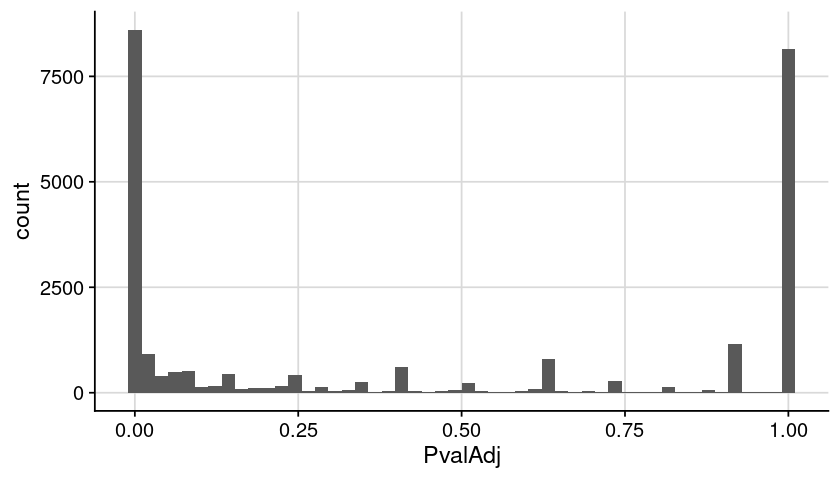

In [58]:
dat = dat_res_fisher
gpt = ggplot(dat, aes(x = PvalAdj)) +
    geom_histogram(bins = 50) +
    theme_cowplot() +
    background_grid()

options(repr.plot.height = 4, repr.plot.width=7)
print(gpt)

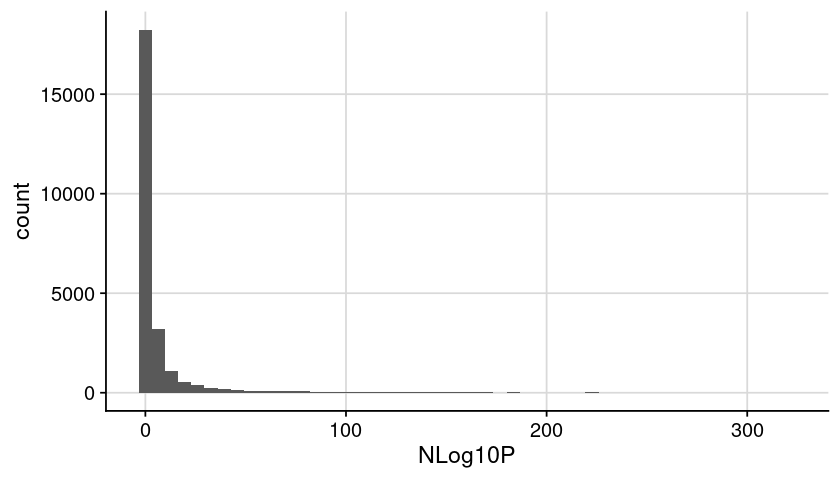

In [59]:
dat = dat_res_fisher
dat = dat %>% dplyr::filter(!is.infinite(NLog10P))
gpt = ggplot(dat, aes(x = NLog10P)) +
    geom_histogram(bins = 50) +
    theme_cowplot() +
    background_grid()

options(repr.plot.height = 4, repr.plot.width=7)
print(gpt)

## Visualization

In [83]:
vec_txt_feature_subset = c(
    "CTCF", "SMC3", "RAD21",
    "TSS", 
    "POLR2A", "EP300", 
    "EZH2", "REST", "SIN3A",
    'H3K27ac', 'H3K4me1', 'H3K4me2', 'H3K4me3', 'H3K27me3')

In [84]:
dat = dat_res_fisher
dat = dat %>% 
    dplyr::mutate(Log2OR = ifelse(is.infinite(Log2OR), 1000, Log2OR)) %>%
    dplyr::select(Group, Feature, Log2OR) %>% 
    tidyr::spread(Feature, Log2OR) %>%
    column_to_rownames(var = "Group")

dat_res_log2or = dat
head(dat)

,ADNP,AFF1,AGO1,ARHGAP35,ARID1B,ARID2,ARID3A,ARID3B,ARID4B,ARNT,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cluster_0,1.1110487,0.3589350,-3.0834225,-0.4152476,4.2619701,-1.2259463,0.7836553,-1.5600549,-1.3894428,0.8951573,⋯,-3.212957,-2.4883351,-1.976709,-0.3439509,0.38258887,-1.6121206,-2.3171592,-0.03795329,-1.2172386,-2.334182
cluster_1,-0.3894774,0.4103317,0.8095198,-0.2081678,-0.7186953,-0.6866108,-1.1404030,-0.4493160,1.4116536,-0.3261168,⋯,-1.642348,0.4651541,-2.514327,-1.6846504,-0.06989208,1.1356276,0.4894915,0.83176031,-0.1189775,1.996068
cluster_10,-0.6110101,0.4446887,-0.5923982,0.4174325,-1.7260825,-2.9232539,-3.0703952,0.1263086,-0.1819775,-1.2817004,⋯,0.000000,-2.0019047,-0.586462,-1.6531109,-1.16810238,-0.8946645,-0.1707139,-1.29262981,-1.8239116,-1.225488
cluster_11,-0.3763098,-3.0777361,-1.1290519,-2.0020162,-2.6292960,-3.4671705,-1.5863717,2.0020162,-1.3819120,-2.7095018,⋯,0.000000,0.0000000,-0.585661,-2.8119729,-1.88091330,-1.7428206,-1.5863717,-0.69878328,-1.2256562,-1.586372
cluster_12,-0.1860835,-3.1197499,0.3923959,-1.7429458,-1.7628976,-4.0267618,-2.8910032,-2.1238725,-2.4398970,-2.7912648,⋯,0.000000,-1.0005927,1.000593,-2.1755966,-2.55720985,-2.3431097,-2.1755966,-2.25190723,-3.4673487,-2.002063
cluster_13,-0.8003831,-3.3614494,-1.5884151,-1.8114961,-2.9015479,-4.9120040,-3.6599835,-0.4871886,-0.5591567,-4.3963186,⋯,0.000000,0.0000000,-1.586491,-2.8181960,-2.83580035,-2.1827700,-1.0025607,-1.42417048,-3.5426378,-2.589055


In [85]:
dat = dat_res_fisher
dat = dat %>% 
    dplyr::mutate(NLog10P = ifelse(is.infinite(NLog10P), 1000, NLog10P)) %>%
    dplyr::select(Group, Feature, NLog10P) %>% 
    tidyr::spread(Feature, NLog10P) %>%
    column_to_rownames(var = "Group")

dat_res_nlogp = dat
head(dat)

,ADNP,AFF1,AGO1,ARHGAP35,ARID1B,ARID2,ARID3A,ARID3B,ARID4B,ARNT,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cluster_0,131.02047971,20.162278,180.7610575,4.845913745,1000.000000,89.201659,81.51542258,56.1649999,198.40263058,130.510100,⋯,24.384268,67.0077605,22.57027501,4.0735120,14.480649,140.0918757,163.17707209,0.1987876,56.7681017,112.90418632
cluster_1,13.39890134,26.264320,69.2631715,2.284819145,84.767655,38.316647,114.75774506,11.6973548,320.33032421,16.017509,⋯,6.801223,3.3534840,39.31324358,107.1854851,0.599770,118.8872313,20.11388171,97.9457744,0.9703509,128.53831125
cluster_10,1.73244436,1.527816,0.3739056,0.009282297,38.375868,15.066117,18.78531759,0.0000000,0.06768888,7.347395,⋯,0.000000,0.2026544,0.00000000,2.1359694,3.054737,1.0456473,0.00000000,4.3858108,2.4461047,0.21849972
cluster_11,0.07924709,3.995726,1.7863665,0.202654423,8.481851,1.756213,0.03329111,0.2026544,2.13914028,1.700156,⋯,0.000000,0.0000000,0.00000000,0.8175711,0.891244,0.7095729,0.03329111,0.3785978,0.2184997,0.03329111
cluster_12,0.03329111,11.372211,0.4493679,0.709572876,13.194029,6.503132,3.27244690,1.2787041,12.82788415,5.018363,⋯,0.000000,0.0000000,0.00000000,0.8404805,3.862631,3.6199563,0.84048049,4.8992069,1.7562130,0.20265442
cluster_13,1.73992361,12.582745,0.2865588,0.458442635,60.656368,13.805877,16.61322453,0.0000000,0.24319612,18.107901,⋯,0.000000,0.0000000,0.03329111,1.9268288,5.260047,1.9160224,0.08934525,2.2983942,4.1374088,0.59873645


In [86]:
dat = dat_res_fisher
vec = dat$Log2OR
idx = is.infinite(vec)
vec = vec[!idx]
print(sum(idx))
summary(vec)

[1] 0


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-11.429  -2.236  -1.012  -1.199   0.000  12.923 

In [98]:
vec_num_breaks = seq(-7, 7, by = 0.1)

vec = brewer.pal(n = 7, name = "RdBu")
vec = colorRampPalette(rev(vec))(length(vec_num_breaks))
vec_txt_colors = vec

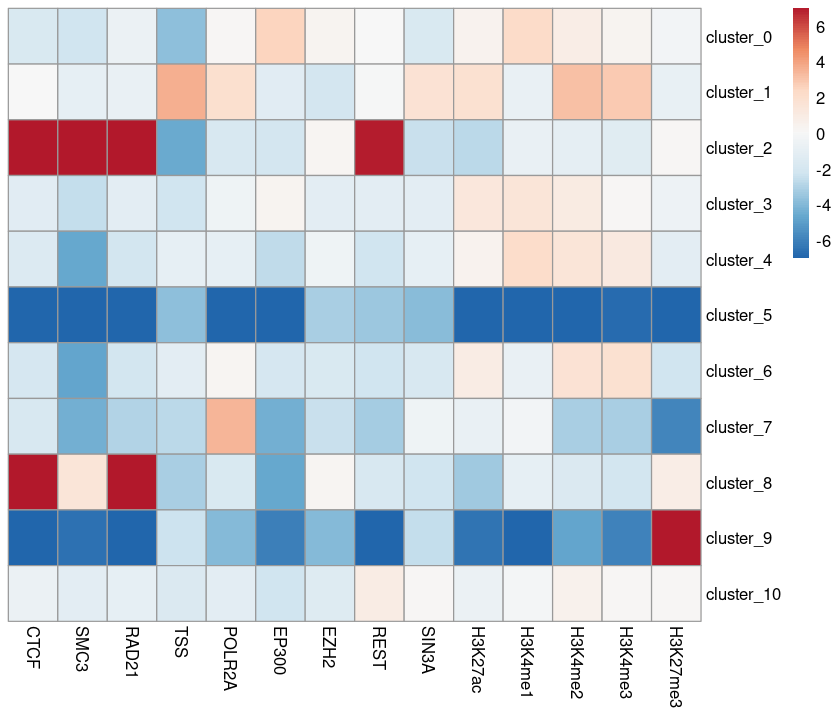

In [99]:
vec = vec_txt_feature_subset
dat = dat_res_log2or
dat = dat[paste("cluster", 0:10, sep="_"), vec_txt_feature_subset]

options(repr.plot.height = 6, repr.plot.width=7)
pheatmap(
    dat,
    color  = vec_txt_colors,
    breaks = vec_num_breaks,
    cluster_rows = FALSE,
    cluster_cols = FALSE
)

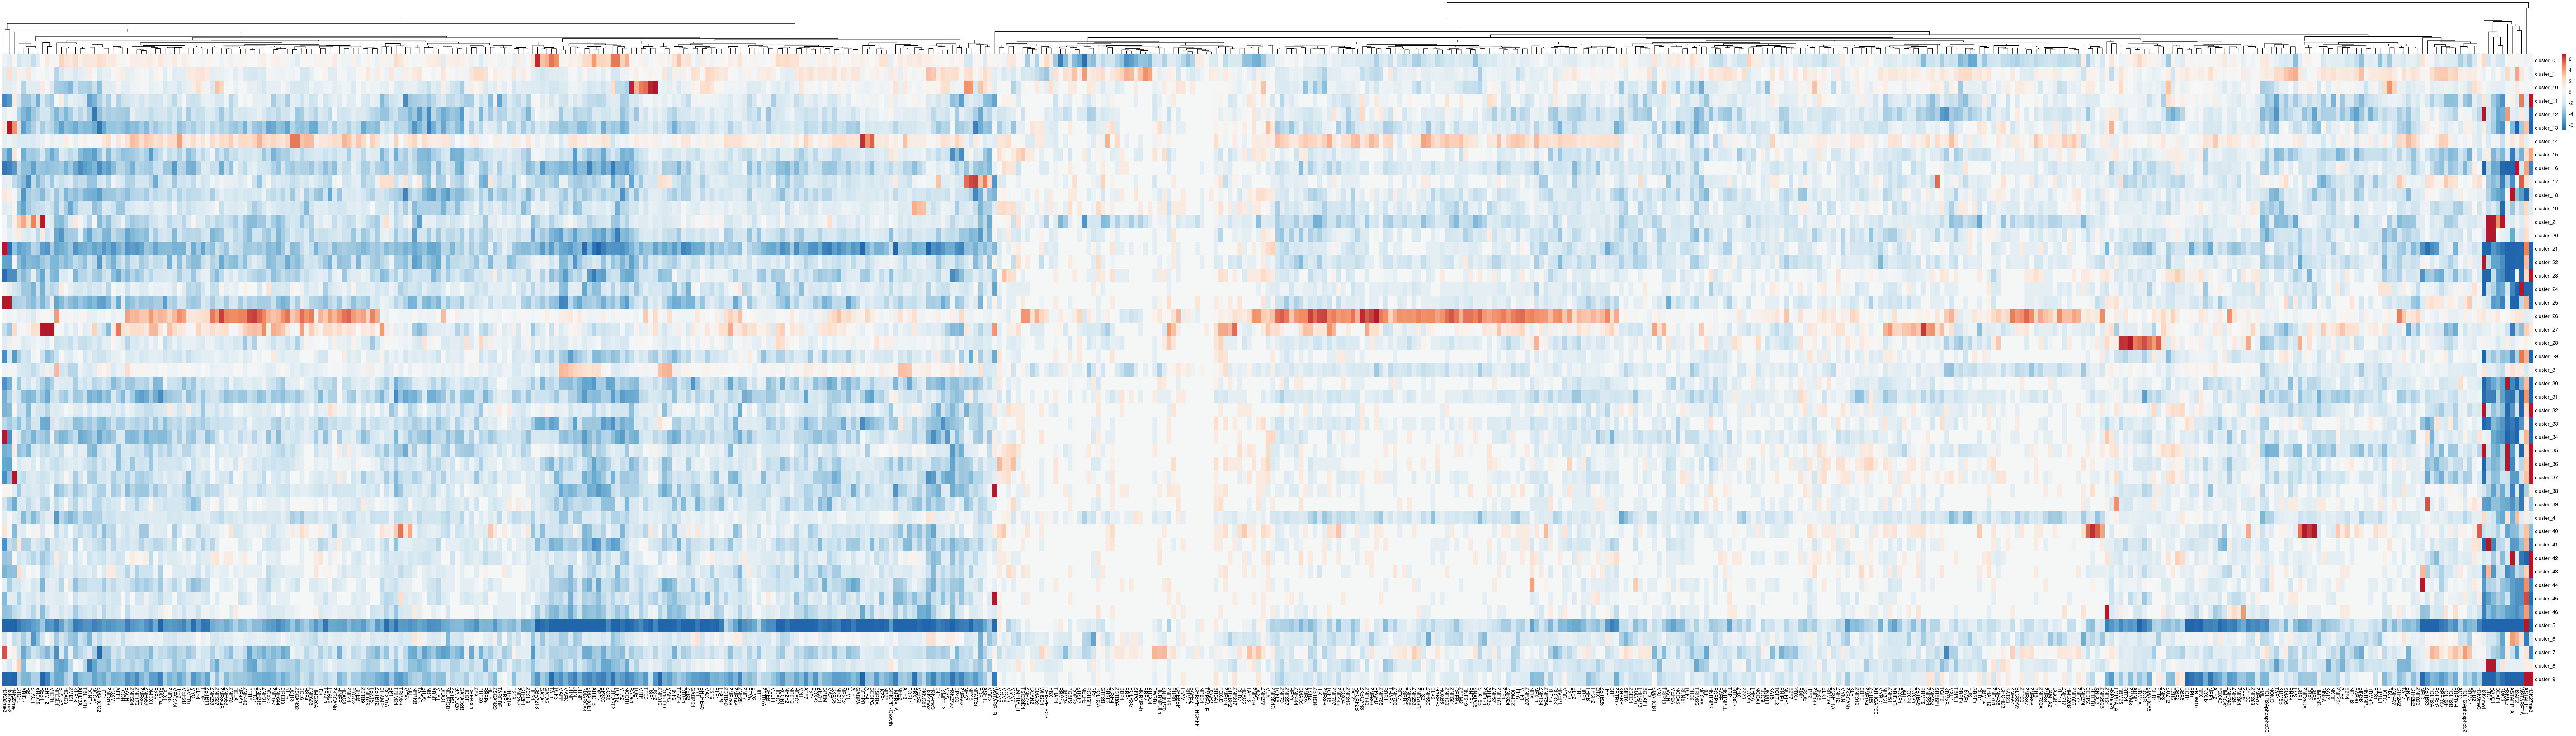

In [100]:
dat = dat = dat_res_log2or

options(repr.plot.height = 20, repr.plot.width  =70)
pheatmap(
    dat,
    color  = vec_txt_colors,
    breaks = vec_num_breaks,
    cluster_rows = FALSE,
    cluster_cols = TRUE,
    treeheight_col = 100
)

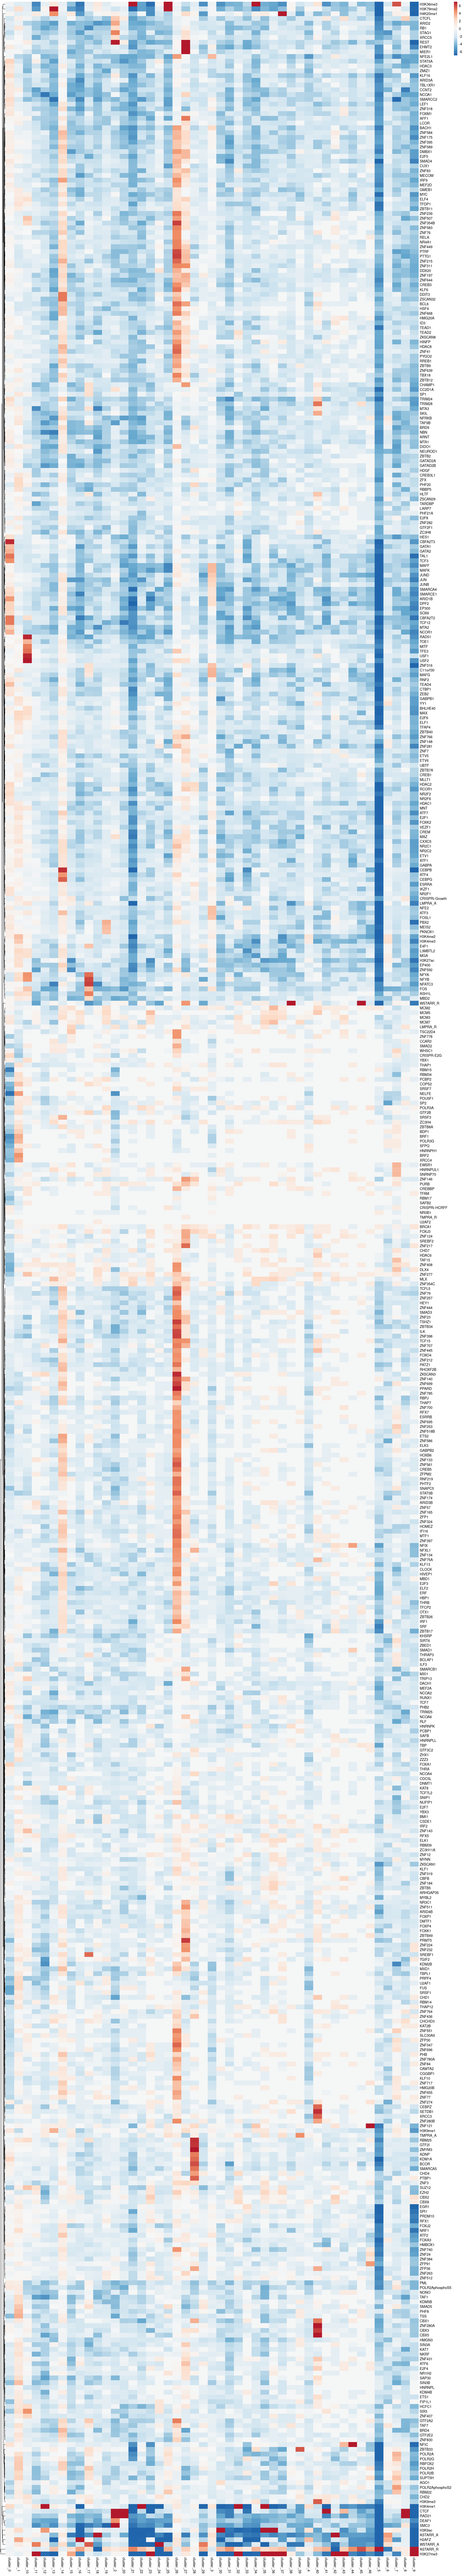

In [104]:
dat = dat = dat_res_log2or

options(repr.plot.height = 100, repr.plot.width  =18)
pheatmap(
    t(dat),
    color  = vec_txt_colors,
    breaks = vec_num_breaks,
    cluster_rows = TRUE,
    cluster_cols = FALSE,
    treeheight_row = 10
)

In [75]:
dat = dat_res_fisher
vec = dat$NLog10P
idx = is.infinite(vec)
vec = vec[!idx]
print(sum(idx))
summary(vec)

[1] 157


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0000   0.0000   0.5275   8.2409   3.9230 320.8024 

In [91]:
vec_num_breaks = seq(0, 300, by = 0.1)

vec = brewer.pal(n = 7, name = "Greys")
vec = c("#FFFFFF", vec)
vec = colorRampPalette(vec)(length(vec_num_breaks))
vec_txt_colors = vec

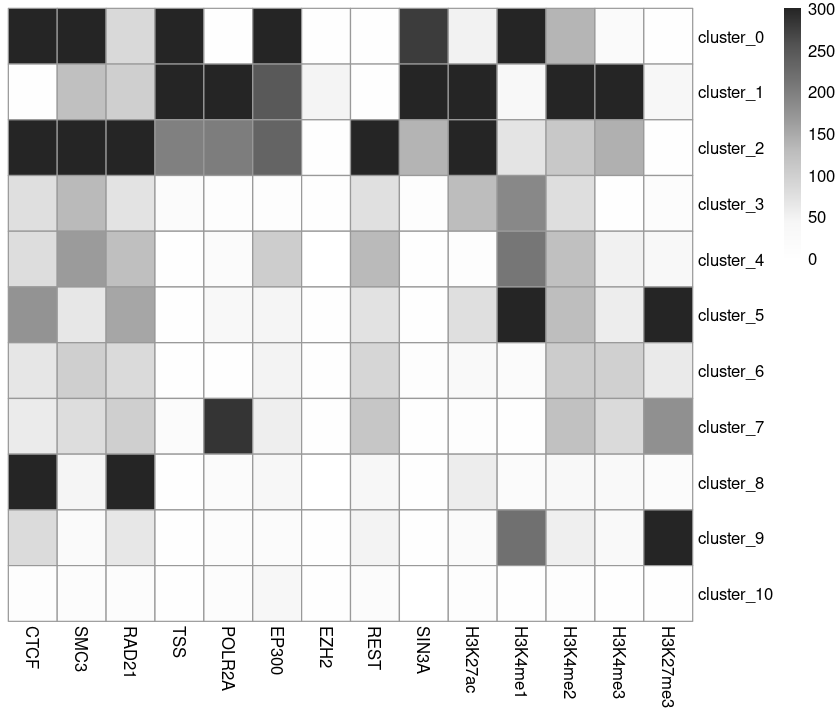

In [92]:
dat = dat_res_nlogp
dat = dat[paste("cluster", 0:10, sep="_"), vec_txt_feature_subset]

options(repr.plot.height = 6, repr.plot.width=7)
pheatmap(
    dat,
    color  = vec_txt_colors,
    breaks = vec_num_breaks,
    cluster_rows = FALSE,
    cluster_cols = FALSE
)

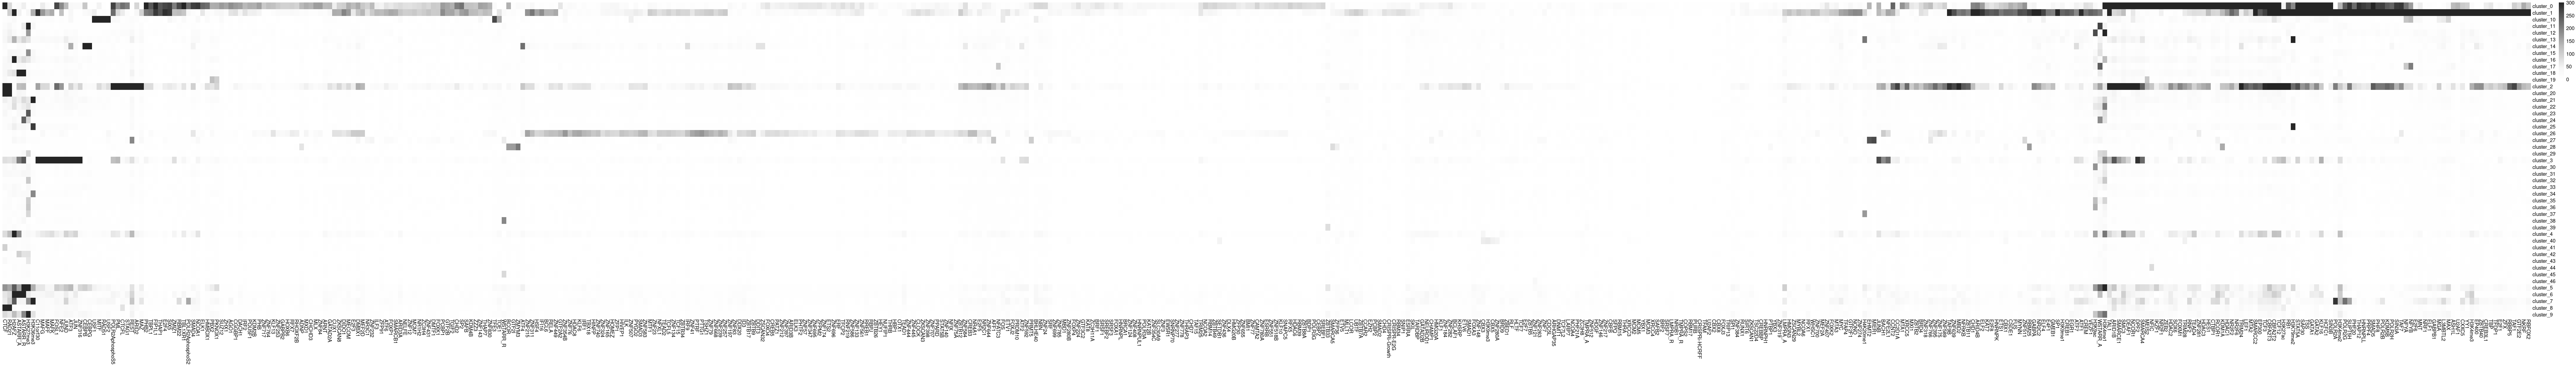

In [94]:
dat = dat_res_nlogp

options(repr.plot.height = 10, repr.plot.width  =70)
pheatmap(
    dat,
    color  = vec_txt_colors,
    breaks = vec_num_breaks,
    cluster_rows = FALSE,
    cluster_cols = TRUE,
    treeheight_col = 0
)